In [1]:
fdir = "../hanglog/mild_swinging"

import os, sys
sys.path.append("..")
import hacktrack.loaders
import pandas, numpy, math
from scipy import optimize
from matplotlib import pyplot as plt
from hacktrack import loaders, utils
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

logfiles = os.listdir(fdir)
print(logfiles)
fLog = os.path.join(fdir, logfiles[0])
fd = loaders.FlyDat(fLog)
fd.LoadC("ZY")

['hdata-2021-01-05_19-24-22.log', 'hdata-2021-01-11_13-37-07.log']
Extracting knowndate from filename: 2021-01-05
E:1, Y:17596, Z:17374, aF:1009, aZ:1026, aA:1026
linAdifftime 28119431.929856114 count 1112
Made for Q 0 last index 0
Made for V 0 last index 0
Loading aQV as no pQV records
Made for aQ 0 last index 0
Made for aV 0 last index 0
Missing GPS data, so setting t0 to 2021-01-05 19:22:58.029930
Made for Z 17374 last index 17374
Warning, using guessed (not GPS) timing corrected value on Z 17374
pCattrname pZ
Made for Y 17596 last index 17596
Warning, using guessed (not GPS) timing corrected value on Y 17596
pCattrname pY


2

In [2]:
#function to return the x and y angles of a vector series
def vecAtanSeries(series):
    theta_x =[]
    theta_y =[]
    theta_z =[] #Angle of resolved x and y components
    for i in range(len(series[0])):
        theta_x.append(math.atan(series[0][i]/series[2][i]))
        theta_y.append(math.atan(series[1][i]/series[2][i]))
        theta_z.append(math.atan((series[0][i]**2 + series[1][i]**2)**0.5/series[2][i]))
    return pandas.Series(theta_x, index=series[0].index), pandas.Series(theta_y, index=series[0].index), pandas.Series(theta_z, index=series[0].index)

def sinSeries(series):
    out=[]
    for angle in series:
        out.append(math.sin(angle))
    return pandas.Series(out, index = series.index)

def cosSeries(series):
    out=[]
    for angle in series:
        out.append(math.cos(angle))
    return pandas.Series(out, index = series.index)

<IPython.core.display.Javascript object>


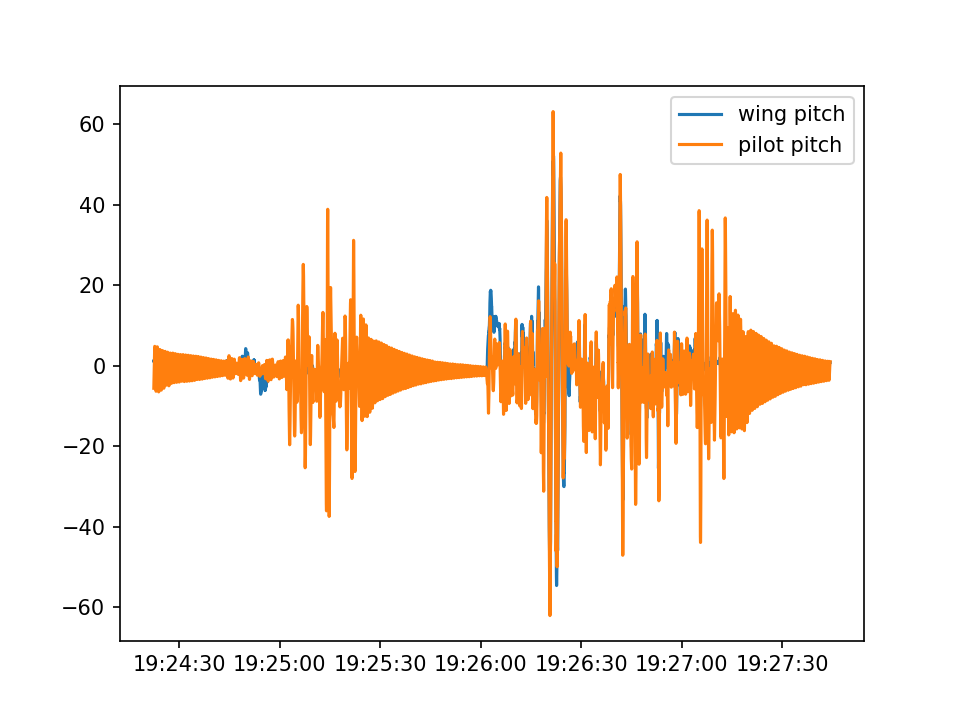

In [3]:
pilot = fd.pZ[~fd.pZ.bad]
wing = fd.pY[~fd.pY.bad]
#wing.insert(6,'gx_app',wing['ax']+wing['gx'],)
#wing.insert(7,'gy_app',wing['ay']+wing['gy'],)
#wing.insert(8,'gz_app',wing['az']+wing['gz'],)


fig = plt.figure()
plt.plot(wing.pitch, label = 'wing pitch')
#plt.plot(wing.heading, label = 'wing heading')
plt.plot(pilot.pitch, label = 'pilot pitch')
#plt.plot(pilot.heading, label = 'pilot heading')
plt.legend()

In [4]:
t1 = pandas.Timestamp('2021-01-05 19:24:45')
pilot_short = pilot[:t1]
def find_rot(q):
    a = utils.qvec((q),(pilot_short.ax,pilot_short.ay,pilot_short.az))
    g = utils.qvec((q),(pilot_short.gx,pilot_short.gy,pilot_short.gz))
    ga = ((a[0]+g[0]),(a[1]+g[1]))#,(a[2]+g[2]-9.81))
    print(q)
    return sum((ga[0]**2+ga[1]**2)**0.5)
q = optimize.minimize(find_rot, (192.0,10446.0,12613.0,-435.0),method='Nelder-Mead')['x']
#ga = find_rot((2.45910605e+02,  1.12952160e+04,  2.01589813e+04,-4.21078565e+00))
#ga

[  192. 10446. 12613.  -435.]
[  201.6 10446.  12613.   -435. ]
[  192.  10968.3 12613.   -435. ]
[  192.   10446.   13243.65  -435.  ]
[  192.   10446.   12613.    -456.75]
[  196.8   10707.15  12928.325  -413.25 ]
[  199.2    10837.725  13085.9875  -391.5   ]
[  186.      10903.0125  13164.81875  -413.25   ]
[  192.6      11131.51875  13440.728125  -402.375   ]
[  192.9       11474.278125  13854.5921875  -386.0625   ]
[  193.05       10862.2078125  14061.52421875  -377.90625   ]
[  193.575      10809.16171875 14785.78632813  -349.359375  ]
[  193.8375     11566.08867188 14201.94238281  -335.0859375 ]
[  194.75625    12126.13300781 14681.08857422  -285.12890625]
[  204.215625   11720.63642578 15038.90854492  -292.77539062]
[  193.5234375  12227.37963867 16094.20031738  -265.16308594]
[  190.68515625 12922.20695801 17598.30672607  -201.99462891]
[  198.71601563 12314.79093018 17197.45289917  -178.56665039]
[  201.62402344 12735.04733276 18868.883255     -74.81872559]
[  202.06552734 13

[ 2.45908263e+02  1.12953883e+04  2.01590984e+04 -4.20448236e+00]
[ 2.45912108e+02  1.12966052e+04  2.01585620e+04 -4.17768764e+00]
[ 2.45908823e+02  1.12947872e+04  2.01591908e+04 -4.22084289e+00]
[ 2.45915690e+02  1.12951012e+04  2.01588933e+04 -4.20778564e+00]
[ 2.45908201e+02  1.12953147e+04  2.01590555e+04 -4.20972212e+00]
[ 2.45906895e+02  1.12950746e+04  2.01590049e+04 -4.22043054e+00]
[ 2.45911024e+02  1.12953036e+04  2.01590141e+04 -4.20639952e+00]
[ 2.45912412e+02  1.12950238e+04  2.01588815e+04 -4.21862928e+00]
[ 2.45909300e+02  1.12952972e+04  2.01590442e+04 -4.20801909e+00]
[ 2.45912092e+02  1.12958799e+04  2.01587159e+04 -4.19585685e+00]
[ 2.45909640e+02  1.12950604e+04  2.01590720e+04 -4.21459638e+00]
[ 2.45905779e+02  1.12950692e+04  2.01593935e+04 -4.21010982e+00]
[ 2.45911422e+02  1.12953313e+04  2.01588730e+04 -4.20947151e+00]
[ 2.45912492e+02  1.12951815e+04  2.01589461e+04 -4.20952113e+00]
[ 2.45910404e+02  1.12951316e+04  2.01589536e+04 -4.21440453e+00]
[ 2.459078

In [5]:
q

array([ 2.45910605e+02,  1.12952160e+04,  2.01589813e+04, -4.21078565e+00])

In [6]:
#These are the values calculated from the single pendulum file
ga = find_rot((192.0,10446.0,12613.0,-435.0))
ga

(192.0, 10446.0, 12613.0, -435.0)


997.3098938099571

In [7]:
pilot_cali_vec = utils.qvec((q),(0,0,1))
pilot_rot_vec = utils.qvec((pilot.q0,pilot.q1,pilot.q2,pilot.q3),pilot_cali_vec)

In [8]:
#NOTE: x and y seem to be the 'wrong' way round for some reason.
#No idea why, but reversing them like this makes them correlate to ax and ay!
theta_y, theta_x, theta_z = vecAtanSeries(pilot_rot_vec) 

In [9]:
theta_x0, theta_x1, theta_x2 = utils.curvefitdifferentiate(theta_x, 0.18)
theta_y0, theta_y1, theta_y2 = utils.curvefitdifferentiate(theta_y, 0.18)

In [10]:
#Pendulum period
g=9.81
t = (43-22)/27
L = g*(t/(2*math.pi))**2
L # pendulum length (this is the length from the pivot to the CoM of the pendulum, not necessarily the length from the pivot to the 9DOF)

0.1503212338427017

In [11]:
a_p = utils.qvec((q),(pilot.ax,pilot.ay,pilot.az))
g_p = utils.qvec((q),(pilot.gx,pilot.gy,pilot.gz))
ga_p = ((a_p[0]+g_p[0]),(a_p[1]+g_p[1]),(a_p[2]+g_p[2]))
#ga_p

In [12]:
#Function to find length from pivot point to centre of 9DoF (actual length is 150.5)
t1 = pandas.Timestamp('2021-01-05 19:24:45')
ga_ps = (ga_p[0][:t1]+ga_p[1][:t1]+ga_p[2][:t1])
theta_x0s = theta_x0[:t1]
theta_x1s = theta_x1[:t1]
theta_x2s = theta_x2[:t1]
theta_y0s = theta_y0[:t1]
theta_y1s = theta_y1[:t1]
theta_y2s = theta_y2[:t1]
theta_zs = theta_z[:t1]

def find_L0(L):
    ga_p_wxs = ga_ps[0] + theta_x2s*L
    ga_p_wys = ga_ps[1] + theta_y2s*L
    ga_p_wzs = ga_ps[2] - L*theta_x1s**2 - L*theta_y1s**2
    ga_wxs = ga_p_wxs*cosSeries(theta_x0s) + ga_p_wzs*sinSeries(theta_x0s)
    ga_wys = ga_p_wys*cosSeries(theta_y0s) + ga_p_wzs*sinSeries(theta_y0s)
    #NOTE, the first angle of the z component needs attention, this is a bodge!
    ga_wzs = ga_p_wzs*cosSeries(theta_zs) - ga_p_wxs*sinSeries(theta_x0s) - ga_p_wxs*sinSeries(theta_x0s)
    out = sum(ga_wxs**2)+sum(ga_wys**2)+ sum((ga_wzs-9.81)**2)
    print(L,out)
    return out

#find_L0(0.15)
optimize.minimize(find_L0, (0.15),method='Nelder-Mead')['x']


[0.15] 340510.45719261013
[0.1575] 340517.0852623246
[0.1425] 340505.6478999027
[0.135] 340502.6573842031
[0.12] 340502.13268382277
[0.105] 340508.88309147116
[0.105] 340508.88309147116
[0.1275] 340501.48564550927
[0.135] 340502.6573842031
[0.12375] 340501.58181753976
[0.13125] 340501.8441677299
[0.125625] 340501.476894743
[0.12375] 340501.58181753976
[0.1265625] 340501.46706093097
[0.1275] 340501.48564550927
[0.12609375] 340501.4684255381
[0.12703125] 340501.47280092107
[0.12632812] 340501.4668551597
[0.12609375] 340501.4684255381
[0.12644531] 340501.4667360272
[0.1265625] 340501.46706093097
[0.12638672] 340501.4667400883


array([0.12644531])

In [15]:
L=0.12644531

In [16]:
ga_p_wx = ga_p[0] + theta_x2*L
ga_p_wy = ga_p[1] + theta_y2*L
ga_p_wz = ga_p[2] - L*theta_x1**2 - L*theta_y1**2
ga_wx = ga_p_wx*cosSeries(theta_x0) + ga_p_wz*sinSeries(theta_x0)
ga_wy = ga_p_wy*cosSeries(theta_y0) + ga_p_wz*sinSeries(theta_y0)
#NOTE, the first angle of the z component needs attention, this is a bodge!
ga_wz = ga_p_wz*cosSeries(theta_x0) - ga_p_wx*sinSeries(theta_x0) - ga_p_wx*sinSeries(theta_x0)

<IPython.core.display.Javascript object>


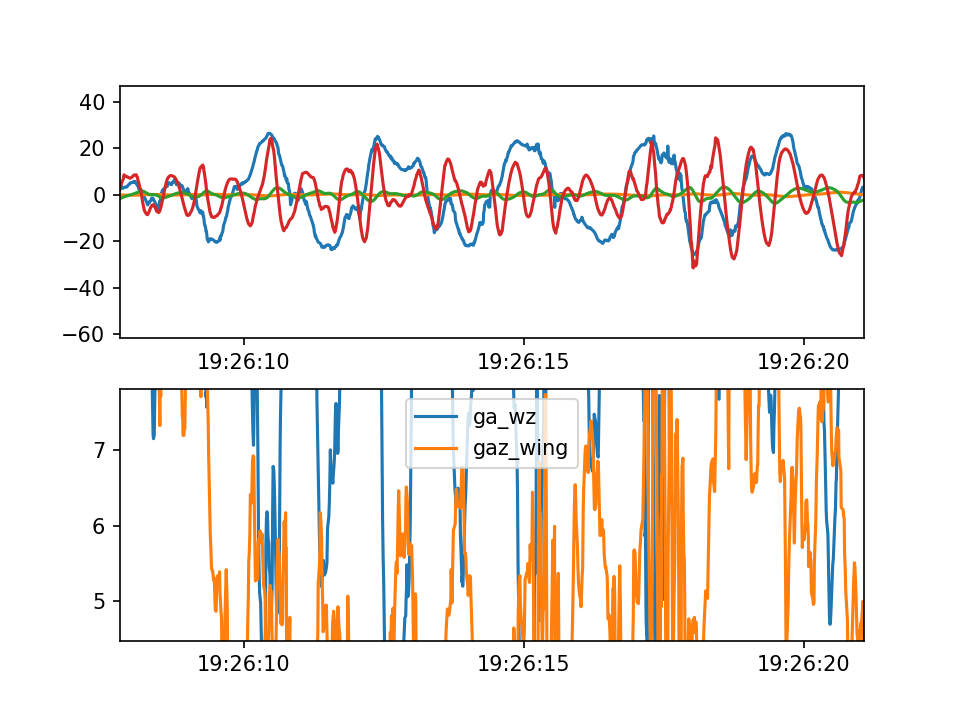

In [29]:
fig = plt.figure()

angles = plt.subplot(211)
plt.plot(-a_p[0]*4, label = 'a_px')
#plt.plot(-a_p[1]*4, label = 'a_py')
plt.plot(theta_x0, label = 'theta_x0')
plt.plot(theta_x1, label = 'theta_x1')
plt.plot(theta_x2, label = 'theta_x2')
#plt.plot(theta_y2, label = 'theta_y2')

accels = plt.subplot(212, sharex=angles)
#plt.plot(ga_wx, label = 'ga_wx')
#plt.plot(ga_wy, label = 'ga_wy')
plt.plot(ga_wz, label = 'ga_wz')
#plt.plot(-(wing.ax-wing.gx), label = 'gax_wing')
#plt.plot(wing.ay-wing.gy, label = 'gay_wing')
plt.plot(wing.gz-wing.az, label = 'gaz_wing')

#plt.plot(pilot.pitch, label = 'pitch')

plt.legend()

In [ ]:
#!!!!!!!!SCRATCH RUBBISH AFTER THIS!!!!!!!!!

<IPython.core.display.Javascript object>


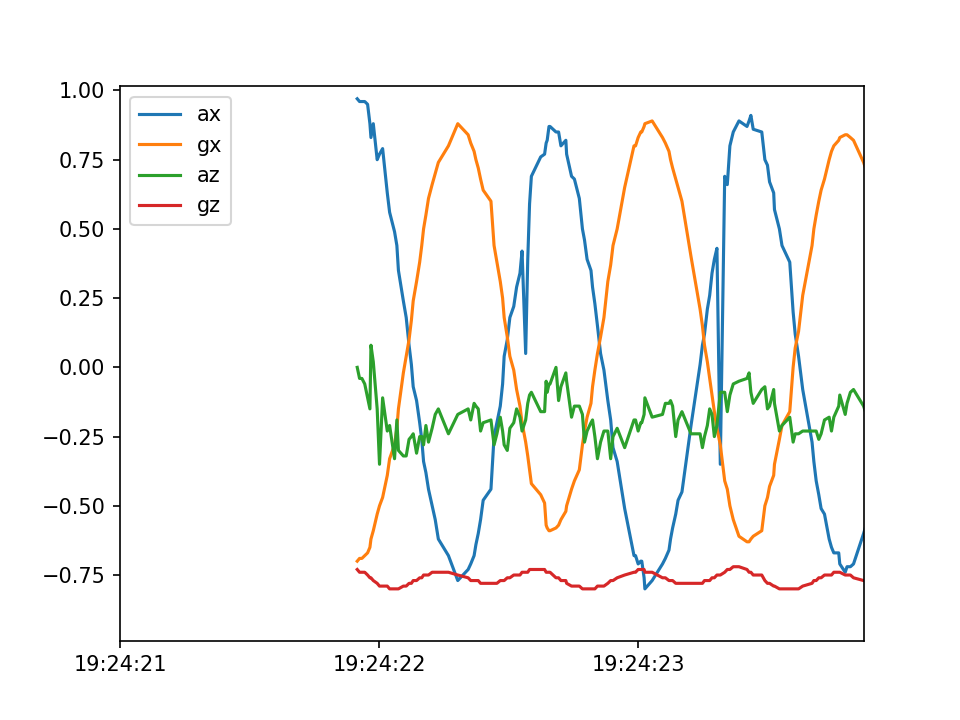

In [78]:
fig = plt.figure()
plt.plot(pilot.ax, label = 'ax')
plt.plot(pilot.gx, label = 'gx')
plt.plot(pilot.az, label = 'az')
plt.plot(pilot.gz+9, label = 'gz')
plt.legend()

In [79]:
a_p_x = pilot.ax- pilot.gx
a_p_y = pilot.ay- pilot.gy
a_p_z = pilot.az- pilot.gz

a_p_x = utils.curvefitdifferentiate(a_p_x, 0.18)[0]
print('Done x')
a_p_y = utils.curvefitdifferentiate(a_p_y, 0.18)[0]
print('Done y')
a_p_z = utils.curvefitdifferentiate(a_p_z, 0.18)[0]
print('Done z')

Done x
Done y
Done z


In [96]:
a_pivot_p_x = L*theta_x2 + a_p_x
a_pivot_p_y = L*theta_y2 + a_p_y
#a_pivot_p_z = a_p_z already as they are connected by the body of the pendulum


<IPython.core.display.Javascript object>


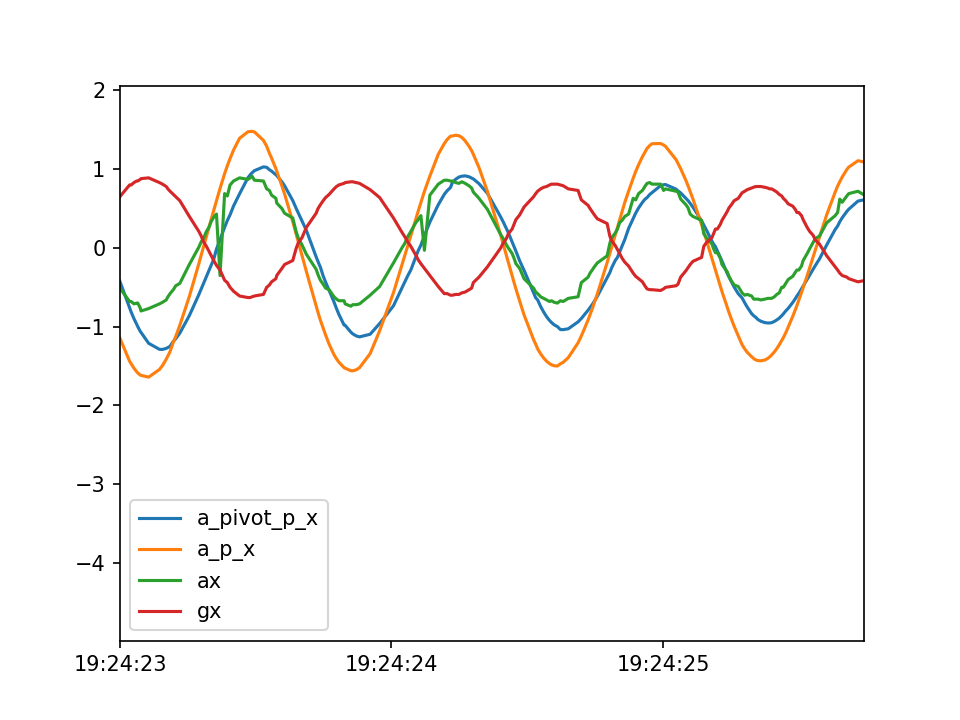

In [100]:
fig = plt.figure()
plt.plot(a_pivot_p_x, label = 'a_pivot_p_x')
plt.plot(a_p_x, label = 'a_p_x')
plt.plot(pilot.ax, label = 'ax')
plt.plot(pilot.gx, label = 'gx')
#plt.plot(pilot.gz, label = 'gz')
#plt.plot(a_pivot_p_y, label = 'a_pivot_p_y')
#plt.plot(a_pivot_z, label = 'a_pivot_z')
plt.legend()

<IPython.core.display.Javascript object>


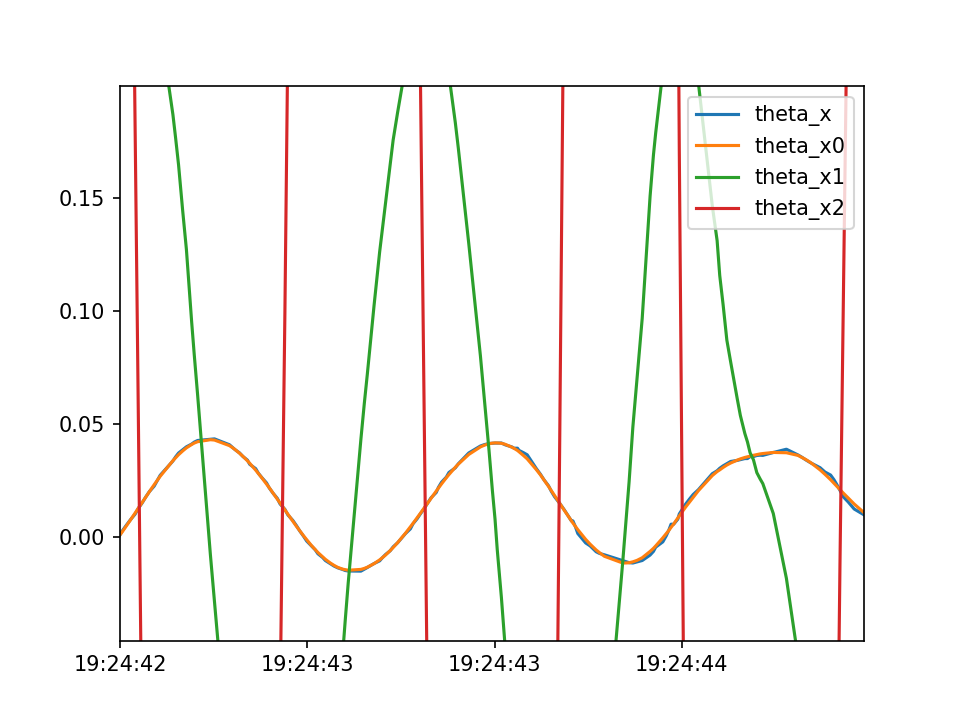

In [25]:
fig = plt.figure()
plt.plot(theta_x, label = 'theta_x')
plt.plot(theta_x0, label = 'theta_x0')
plt.plot(theta_x1, label = 'theta_x1')
plt.plot(theta_x2, label = 'theta_x2')
plt.legend()

In [3]:
#Apparent g force in world reference frame:
g_app_vec_wing = utils.qvec((wing.q0,-wing.q1,-wing.q2,-wing.q3),(wing.gx_app,wing.gy_app,wing.gz_app))
g_appx_wing = utils.curvefitdifferentiate(g_app_vec_wing[0], 0.18)[0]
print('Done x')
g_appy_wing = utils.curvefitdifferentiate(g_app_vec_wing[1], 0.18)[0]
print('Done y')
g_appz_wing = utils.curvefitdifferentiate(g_app_vec_wing[2], 0.18)[0]
print('Done z')

Done x
Done y
Done z


In [4]:
g_appx_wingI = utils.InterpT(pilot, g_appx_wing)
g_appy_wingI = utils.InterpT(pilot, g_appy_wing)
g_appz_wingI = utils.InterpT(pilot, g_appz_wing)
g_app_vec_wingI = (g_appx_wingI,g_appy_wingI,g_appz_wingI)

In [5]:
cali = (0.00872085, -0.00682147, -0.36515998)
ang_vec_pilot = utils.qvec((pilot.q0,-pilot.q1,-pilot.q2,-pilot.q3),cali)

In [6]:
vcali=(pandas.Series([0.00872085]*len(ang_vec_pilot[0]), index = ang_vec_pilot[0].index),
       pandas.Series([-0.00682147]*len(ang_vec_pilot[0]), index = ang_vec_pilot[0].index),
       pandas.Series([-0.36515998]*len(ang_vec_pilot[0]), index = ang_vec_pilot[0].index))
#vcali

In [7]:
swing_ang = utils.vecAngSeries(ang_vec_pilot,vcali)
g_app_ang = utils.vecAngSeries(g_app_vec_wingI,vcali)
g_swing_ang = utils.vecAngSeries(ang_vec_pilot,g_app_vec_wingI)

In [8]:
pilot_acc = (pilot.ax**2 + pilot.ay**2)**0.5
pilot_accF = utils.curvefitdifferentiate(pilot_acc, 0.18)[0]

In [9]:
g_app_mod_wingI = utils.vecModSeries(g_app_vec_wingI)

In [10]:
pilot_acc_calc = g_app_mod_wingI * numpy.sin(g_swing_ang)
err = pilot_acc_calc - pilot_accF

<IPython.core.display.Javascript object>


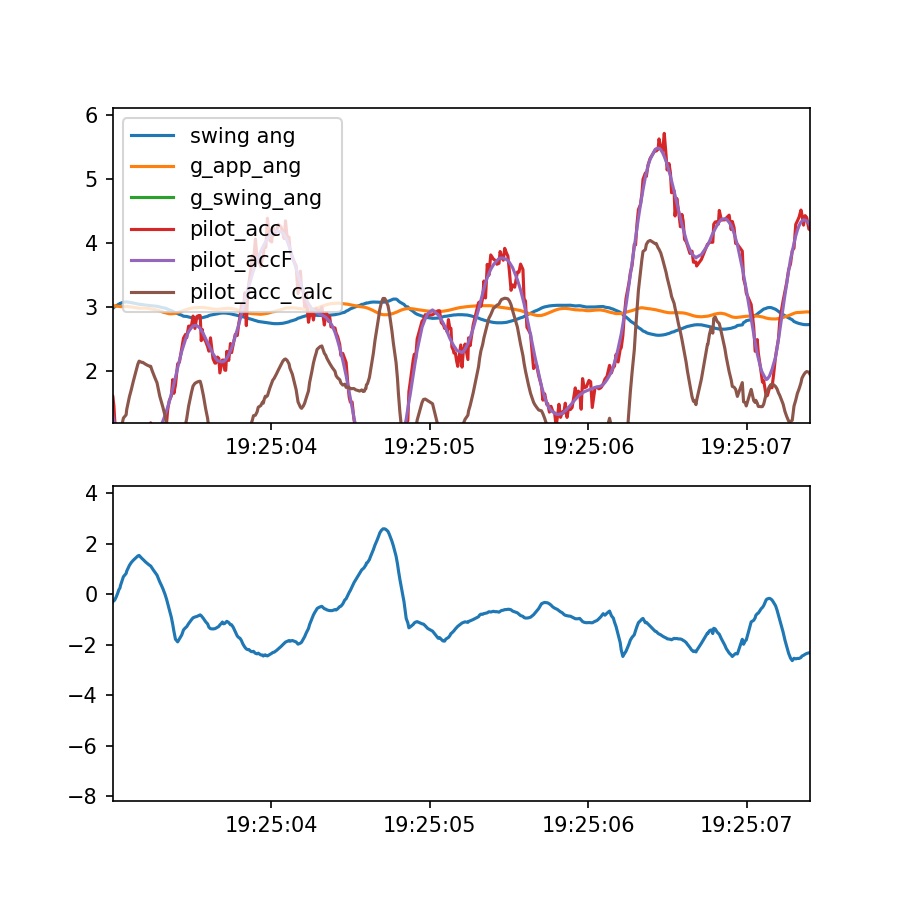

In [11]:
fig = plt.figure(figsize = (6,6))
main = plt.subplot(211)
plt.plot(swing_ang, label ='swing ang')
plt.plot(g_app_ang, label ='g_app_ang')
plt.plot(g_swing_ang, label = 'g_swing_ang')
plt.plot(pilot_acc, label = 'pilot_acc')
plt.plot(pilot_accF, label = 'pilot_accF')
plt.plot(pilot_acc_calc, label = 'pilot_acc_calc')
plt.legend()
plt.subplot(212, sharex = main)
plt.plot(err)


In [29]:
t1 = pandas.Timestamp('2021-01-05 19:24:45')
pilot_short = pilot[:t1]
wing_short = wing[:t1]
g_app_vec_wing_short = utils.qvec((wing_short.q0,-wing_short.q1,-wing_short.q2,-wing_short.q3),(wing_short.gx_app,wing_short.gy_app,wing_short.gz_app))
g_appx_wing_short = utils.curvefitdifferentiate(g_app_vec_wing_short[0], 0.18)[0]
print('Done x')
g_appy_wing_short = utils.curvefitdifferentiate(g_app_vec_wing_short[1], 0.18)[0]
print('Done y')
g_appz_wing_short = utils.curvefitdifferentiate(g_app_vec_wing_short[2], 0.18)[0]
print('Done z')
g_appx_wingI_short = utils.InterpT(pilot_short, g_appx_wing_short)
g_appy_wingI_short = utils.InterpT(pilot_short, g_appy_wing_short)
g_appz_wingI_short = utils.InterpT(pilot_short, g_appz_wing_short)
g_app_vec_wingI_short = (g_appx_wingI_short,g_appy_wingI_short,g_appz_wingI_short)
g_app_mod_wingI_short = utils.vecModSeries(g_app_vec_wingI_short)
pilot_acc_short = (pilot_short.ax**2 + pilot_short.ay**2)**0.5
pilot_accF_short = utils.curvefitdifferentiate(pilot_acc_short, 0.18)[0]

Done x
Done y
Done z


In [44]:
def calc_err(cali):
    ang_vec_pilot_short = utils.qvec((pilot_short.q0,-pilot_short.q1,-pilot_short.q2,-pilot_short.q3),cali)
    g_swing_ang_short = utils.vecAngSeries(ang_vec_pilot_short,g_app_vec_wingI_short)
    pilot_acc_calc_short = g_app_mod_wingI_short * numpy.sin(g_swing_ang_short)
    err = pilot_acc_calc_short - pilot_accF_short
    print(cali)
    return sum(err**2)
optimize.minimize(calc_err, (0,0,-1),method='Nelder-Mead')
#calc_err((0,0,-1))

[ 0.  0. -1.]
[ 2.5e-04  0.0e+00 -1.0e+00]
[ 0.0e+00  2.5e-04 -1.0e+00]
[ 0.    0.   -1.05]
[ 1.66666667e-04 -2.50000000e-04 -1.03333333e+00]
[ 2.50e-04 -5.00e-04 -1.05e+00]
[ 3.33333333e-04 -3.33333333e-04 -1.06666667e+00]
[ 5.55555556e-04 -5.55555556e-04 -1.02777778e+00]
[ 8.33333333e-04 -8.33333333e-04 -1.01666667e+00]
[ 6.94444444e-04 -1.11111111e-03 -1.08888889e+00]
[ 9.16666667e-04 -1.66666667e-03 -1.13333333e+00]
[ 1.00000000e-03 -1.66666667e-03 -1.06666667e+00]
[ 0.00133333 -0.00233333 -1.06666667]
[ 0.00180556 -0.00272222 -1.09444444]
[ 0.00258333 -0.00383333 -1.11666667]
[ 0.00238889 -0.00438889 -1.19444444]
[ 0.00316667 -0.00616667 -1.28333333]
[ 0.00380556 -0.00655556 -1.17777778]
[ 0.00525 -0.009   -1.2    ]
[ 0.006      -0.01033333 -1.33333333]
[ 0.00833333 -0.01433333 -1.46666667]
[ 0.00858333 -0.01583333 -1.51666667]
[ 0.01158333 -0.02183333 -1.71666667]
[ 0.01361111 -0.02394444 -1.63888889]
[ 0.01883333 -0.03283333 -1.81666667]
[ 0.02058333 -0.037      -2.13333333]
[ 0

 final_simplex: (array([[ 0.00872085, -0.00682147, -0.36515998],
       [ 0.00872256, -0.00682278, -0.3652452 ],
       [ 0.00871819, -0.00681957, -0.3650732 ],
       [ 0.00872196, -0.00682262, -0.36521943]]), array([6.16490028, 6.1649003 , 6.1649003 , 6.16490031]))
           fun: 6.1649002814776726
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 74
        status: 0
       success: True
             x: array([ 0.00872085, -0.00682147, -0.36515998])

<IPython.core.display.Javascript object>


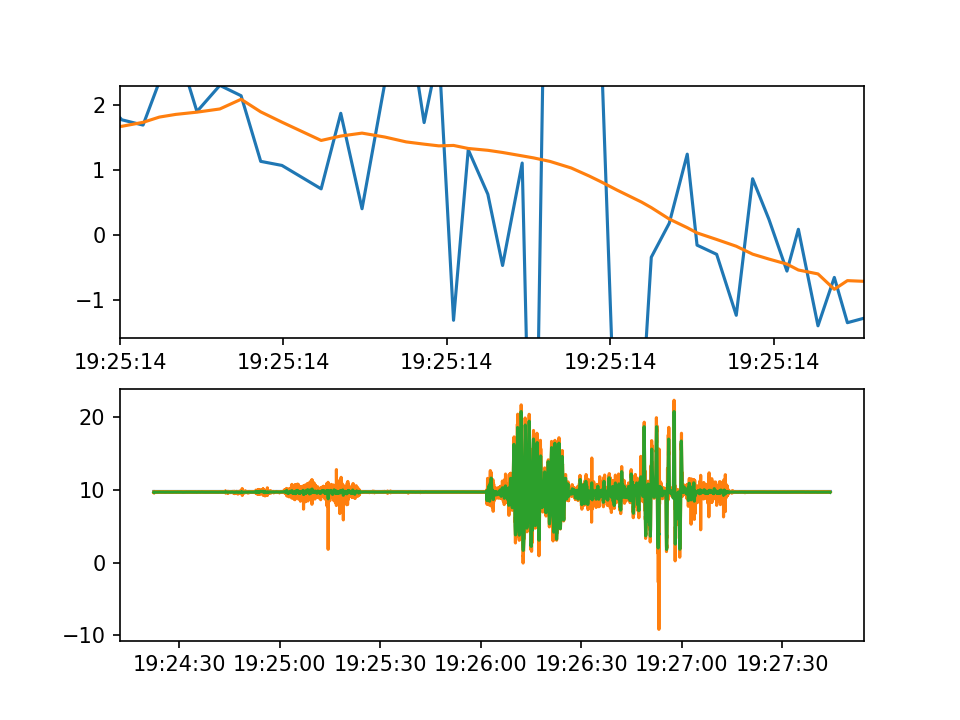

In [6]:
gvec_wing = utils.qvec((wing.q0,-wing.q1,-wing.q2,-wing.q3),(wing.gx,wing.gy,wing.gz))
gvec_pilot = utils.qvec((pilot.q0,-pilot.q1,-pilot.q2,-pilot.q3),(pilot.gx,pilot.gy,pilot.gz))
fig = plt.figure()
plt.subplot(211)
#plt.plot(gvec_wing[0])
plt.plot(g_app_vec_wing[0])
plt.plot(g_appx_wing)
#plt.plot(g_app_vec_wing[1])
#plt.plot(g_appy_wing)
#plt.plot(gvec_wing[1])
#plt.plot(gvec_pilot[0])
#plt.plot(gvec_pilot[1])
plt.subplot(212)
plt.plot(gvec_wing[2])
plt.plot(g_app_vec_wing[2])
plt.plot(g_appz_wing)

In [40]:
pilot

,ax,ay,az,gx,gy,gz,q0,q1,q2,q3,s,iqsq,pitch,roll,heading,bad
2021-01-05 19:24:22.416930,0.97,0.89,0.00,-0.70,-0.95,-9.73,56.0,-10451.0,-12579.0,991.0,255.0,3.725229e-09,-5.580045,-4.124025,349.239992,False
2021-01-05 19:24:22.425930,0.96,0.81,-0.04,-0.69,-0.88,-9.74,23.0,-10452.0,-12582.0,944.0,255.0,3.725190e-09,-5.179844,-4.091791,349.247900,False
2021-01-05 19:24:22.434930,0.96,0.81,-0.04,-0.69,-0.88,-9.74,23.0,-10452.0,-12582.0,944.0,255.0,3.725190e-09,-5.179844,-4.091791,349.247900,False
2021-01-05 19:24:22.445930,0.96,0.74,-0.06,-0.68,-0.81,-9.74,8.0,10454.0,12584.0,-891.0,255.0,3.725267e-09,-4.756131,-4.022498,349.267831,False
2021-01-05 19:24:22.456930,0.95,0.68,-0.11,-0.67,-0.73,-9.75,38.0,10456.0,12586.0,-833.0,255.0,3.725357e-09,-4.310067,-3.925426,349.289067,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-05 19:27:44.233930,-0.07,-0.38,-0.10,0.25,0.14,-9.80,170.0,-4635.0,-15713.0,-175.0,255.0,3.725212e-09,0.837489,1.486698,1382.859001,False
2021-01-05 19:27:44.246930,-0.06,-0.39,-0.05,0.25,0.15,-9.80,169.0,-4635.0,-15713.0,-186.0,255.0,3.725161e-09,0.913247,1.501740,1382.857898,False
2021-01-05 19:27:44.255930,-0.05,-0.41,-0.04,0.25,0.16,-9.80,168.0,-4636.0,-15712.0,-194.0,255.0,3.725431e-09,0.968809,1.510985,1382.865779,False
2021-01-05 19:27:44.268930,-0.05,-0.42,-0.02,0.25,0.17,-9.80,167.0,-4636.0,-15712.0,-200.0,255.0,3.725403e-09,1.011031,1.516142,1382.865177,False


<IPython.core.display.Javascript object>


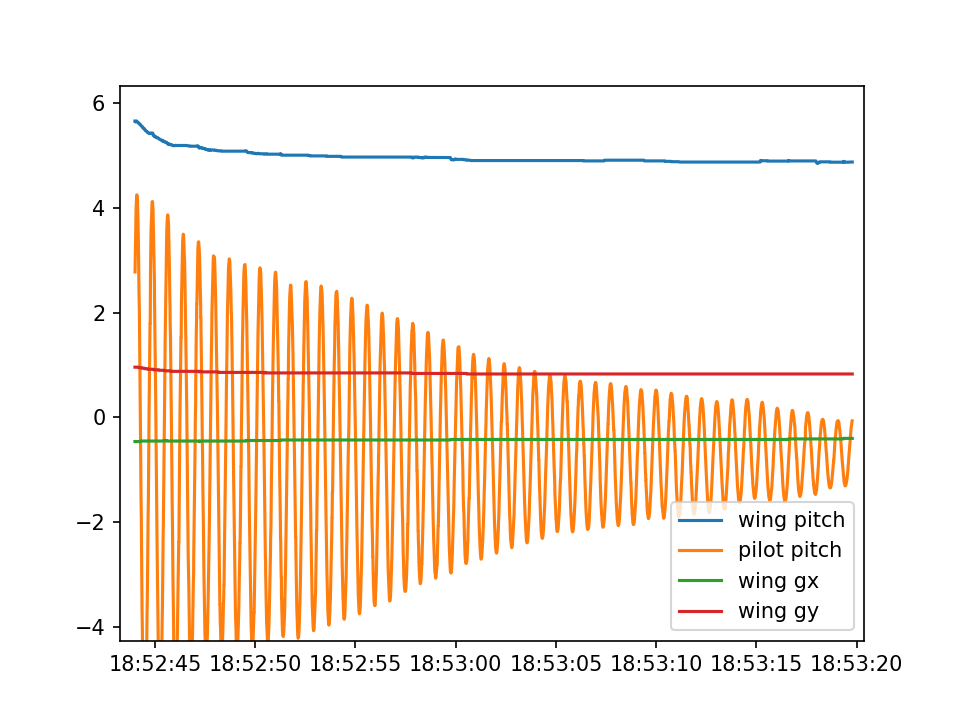

In [13]:
t0 = pandas.Timestamp('2021-01-01 18:52:44')

pilot_fit = pilot[t0:]
wing_fit = wing[t0:]

fig = plt.figure()
plt.plot(wing_fit.pitch, label = 'wing pitch')
plt.plot(pilot_fit.pitch, label = 'pilot pitch')
plt.plot(wing_fit.gx, label = 'wing gx')
plt.plot(wing_fit.gy, label = 'wing gy')
plt.legend()

<IPython.core.display.Javascript object>


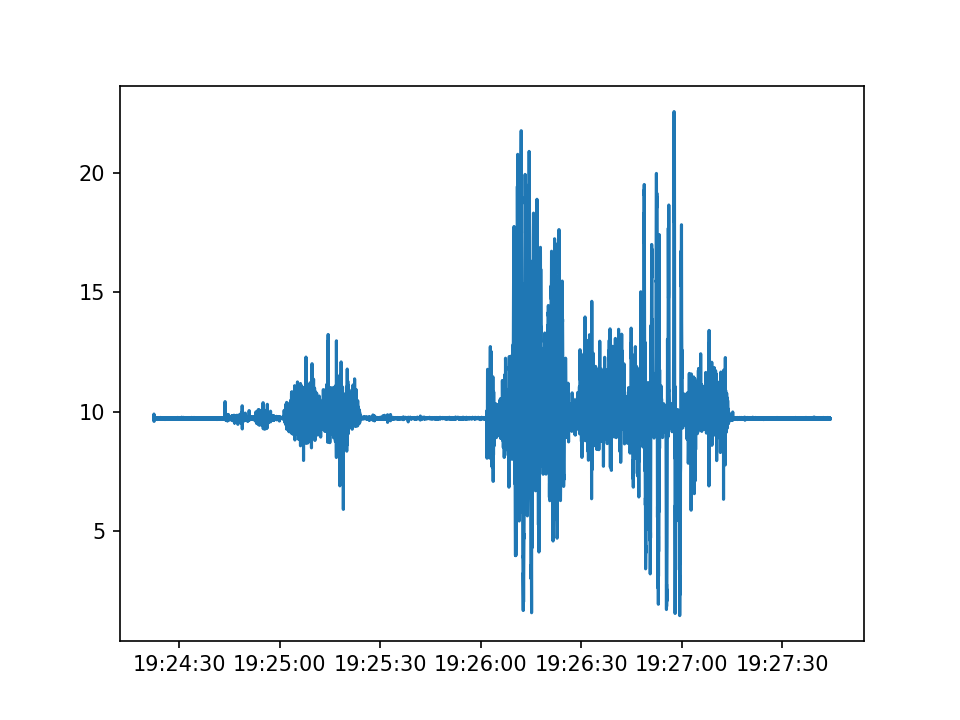

In [5]:
g_app_wing = (wing.gx_app**2+wing.gy_app**2+wing.gz_app**2)**0.5
fig = plt.figure()
plt.plot(g_app_wing)